
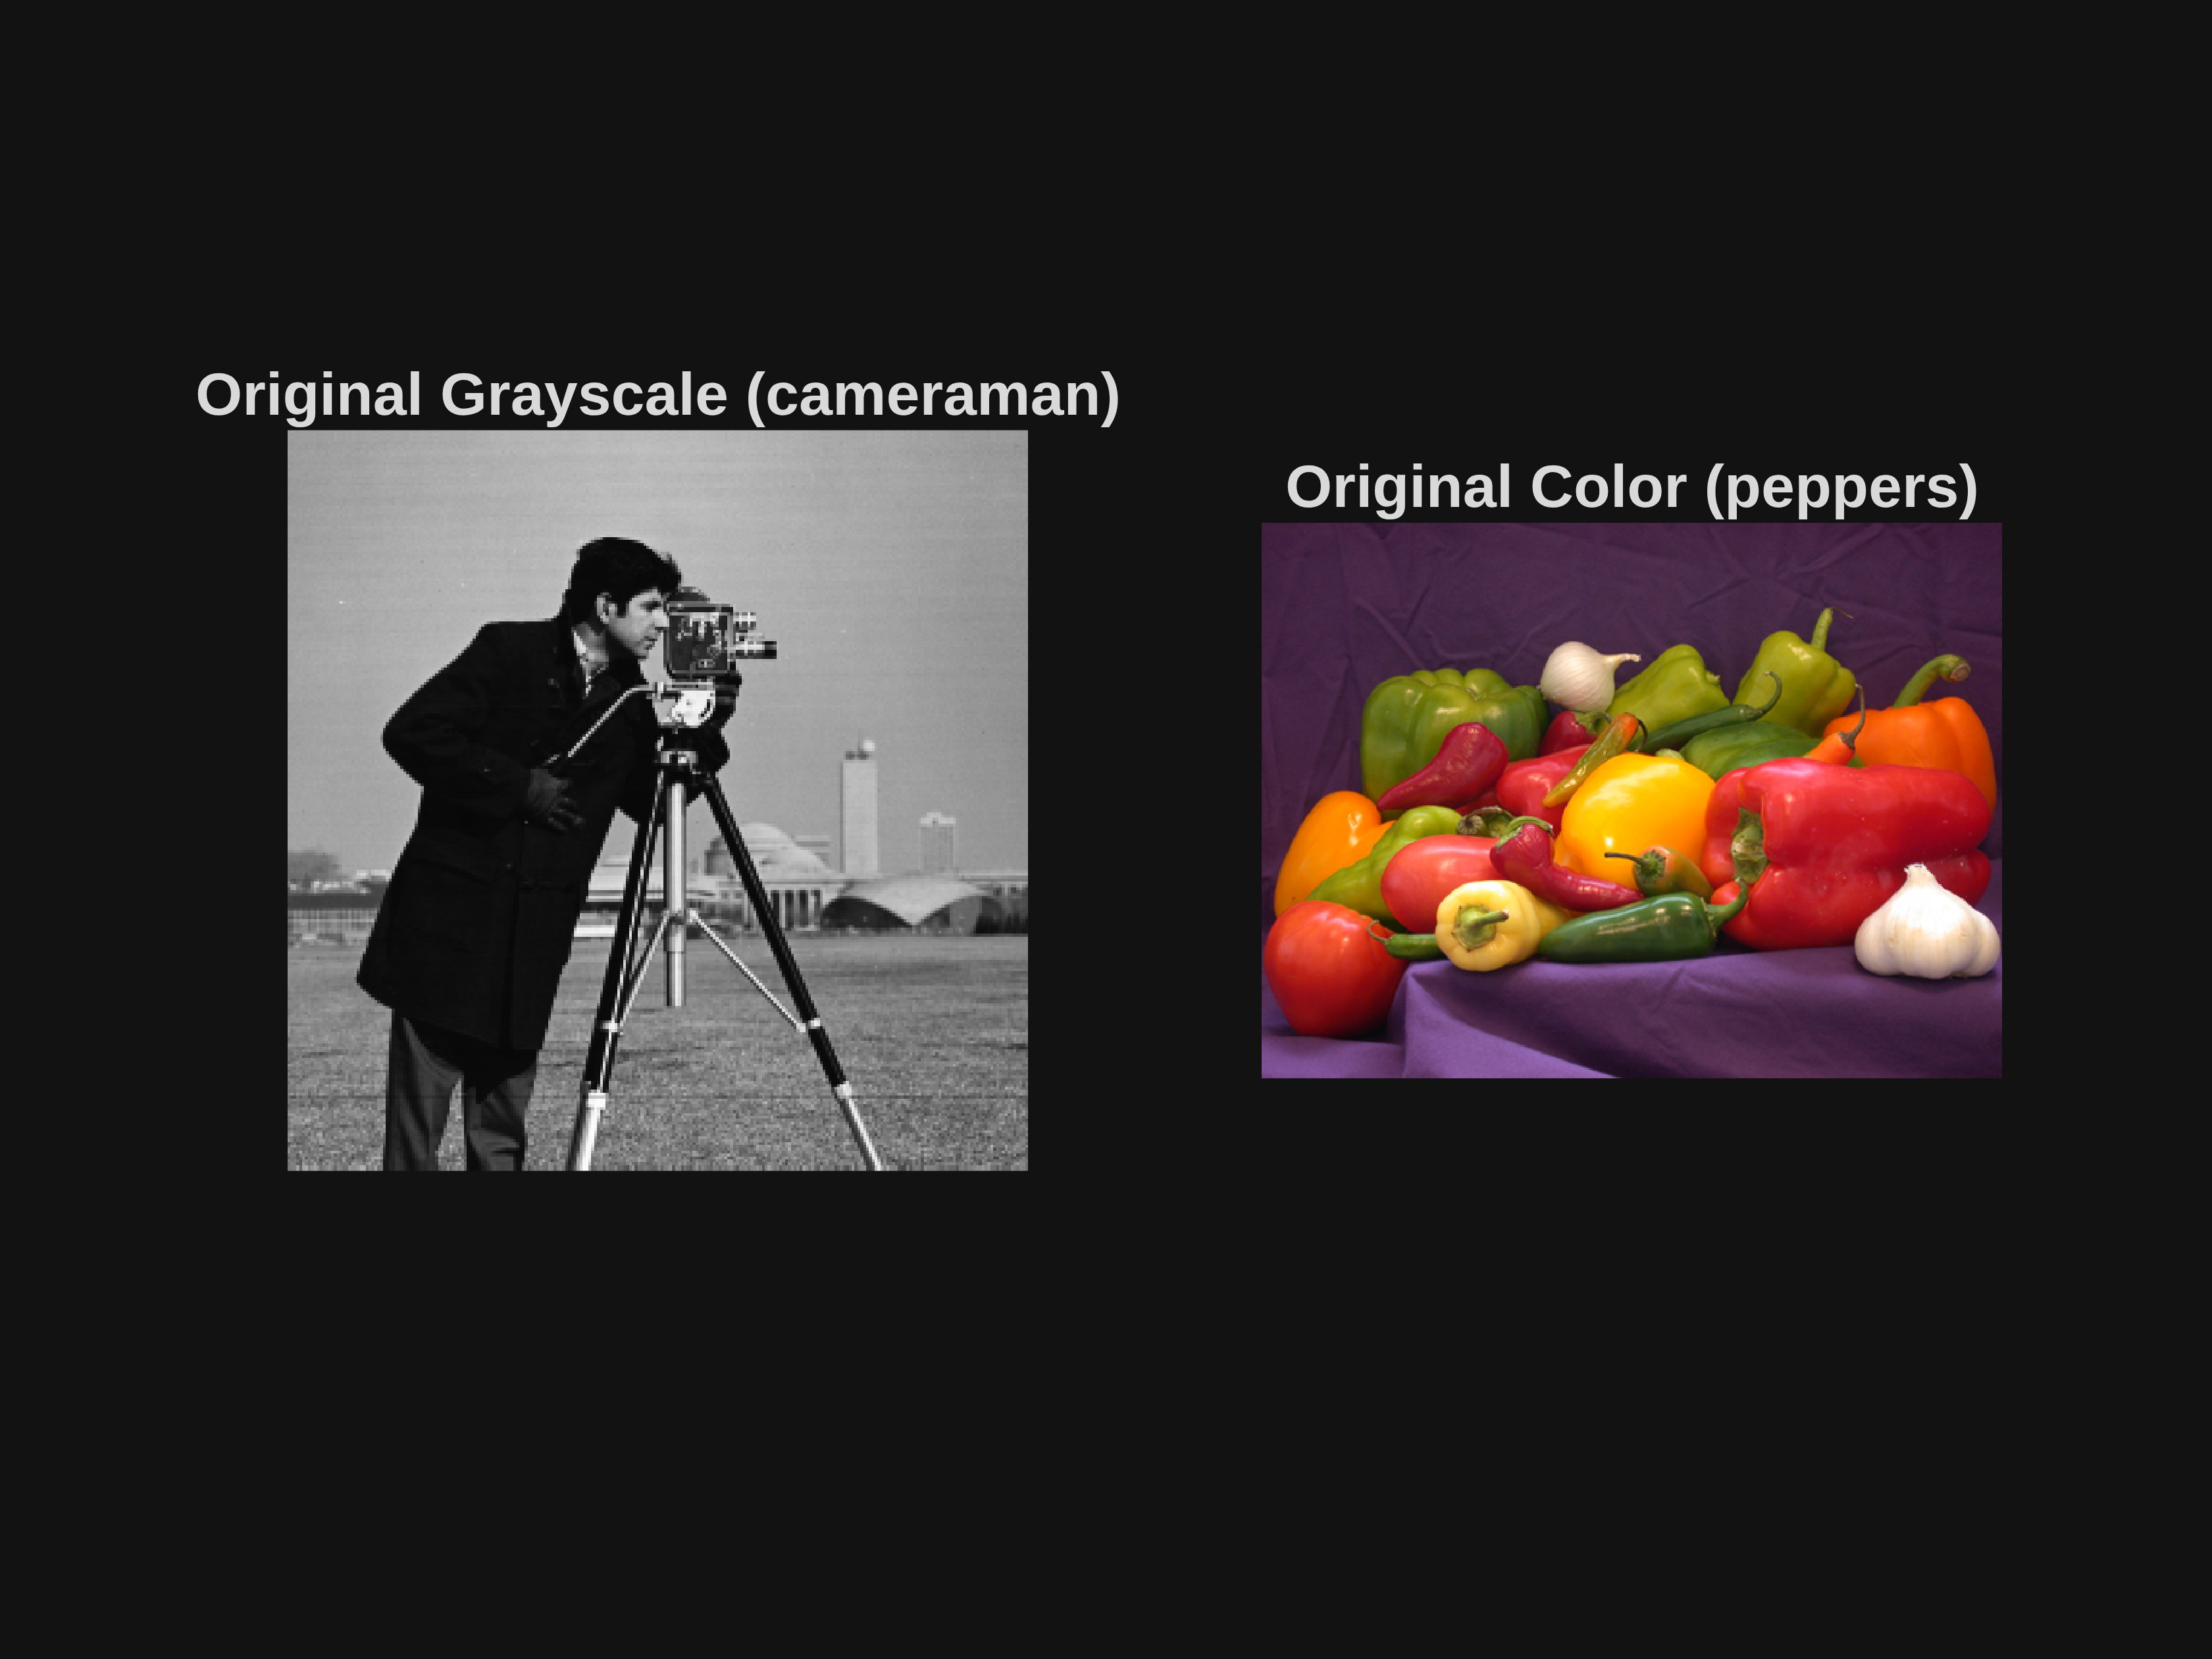

In [1]:
%% Program: Visualize Fourier Spectra of Images

close all; clear; clc;

%% 1. Load standard demo images (grayscale and color)
I_gray  = imread('cameraman.tif');
I_color = imread('peppers.png');

figure;
subplot(1,2,1); imshow(I_gray);  title('Original Grayscale (cameraman)');
subplot(1,2,2); imshow(I_color); title('Original Color (peppers)');


## 2. Fourier spectrum of grayscale image


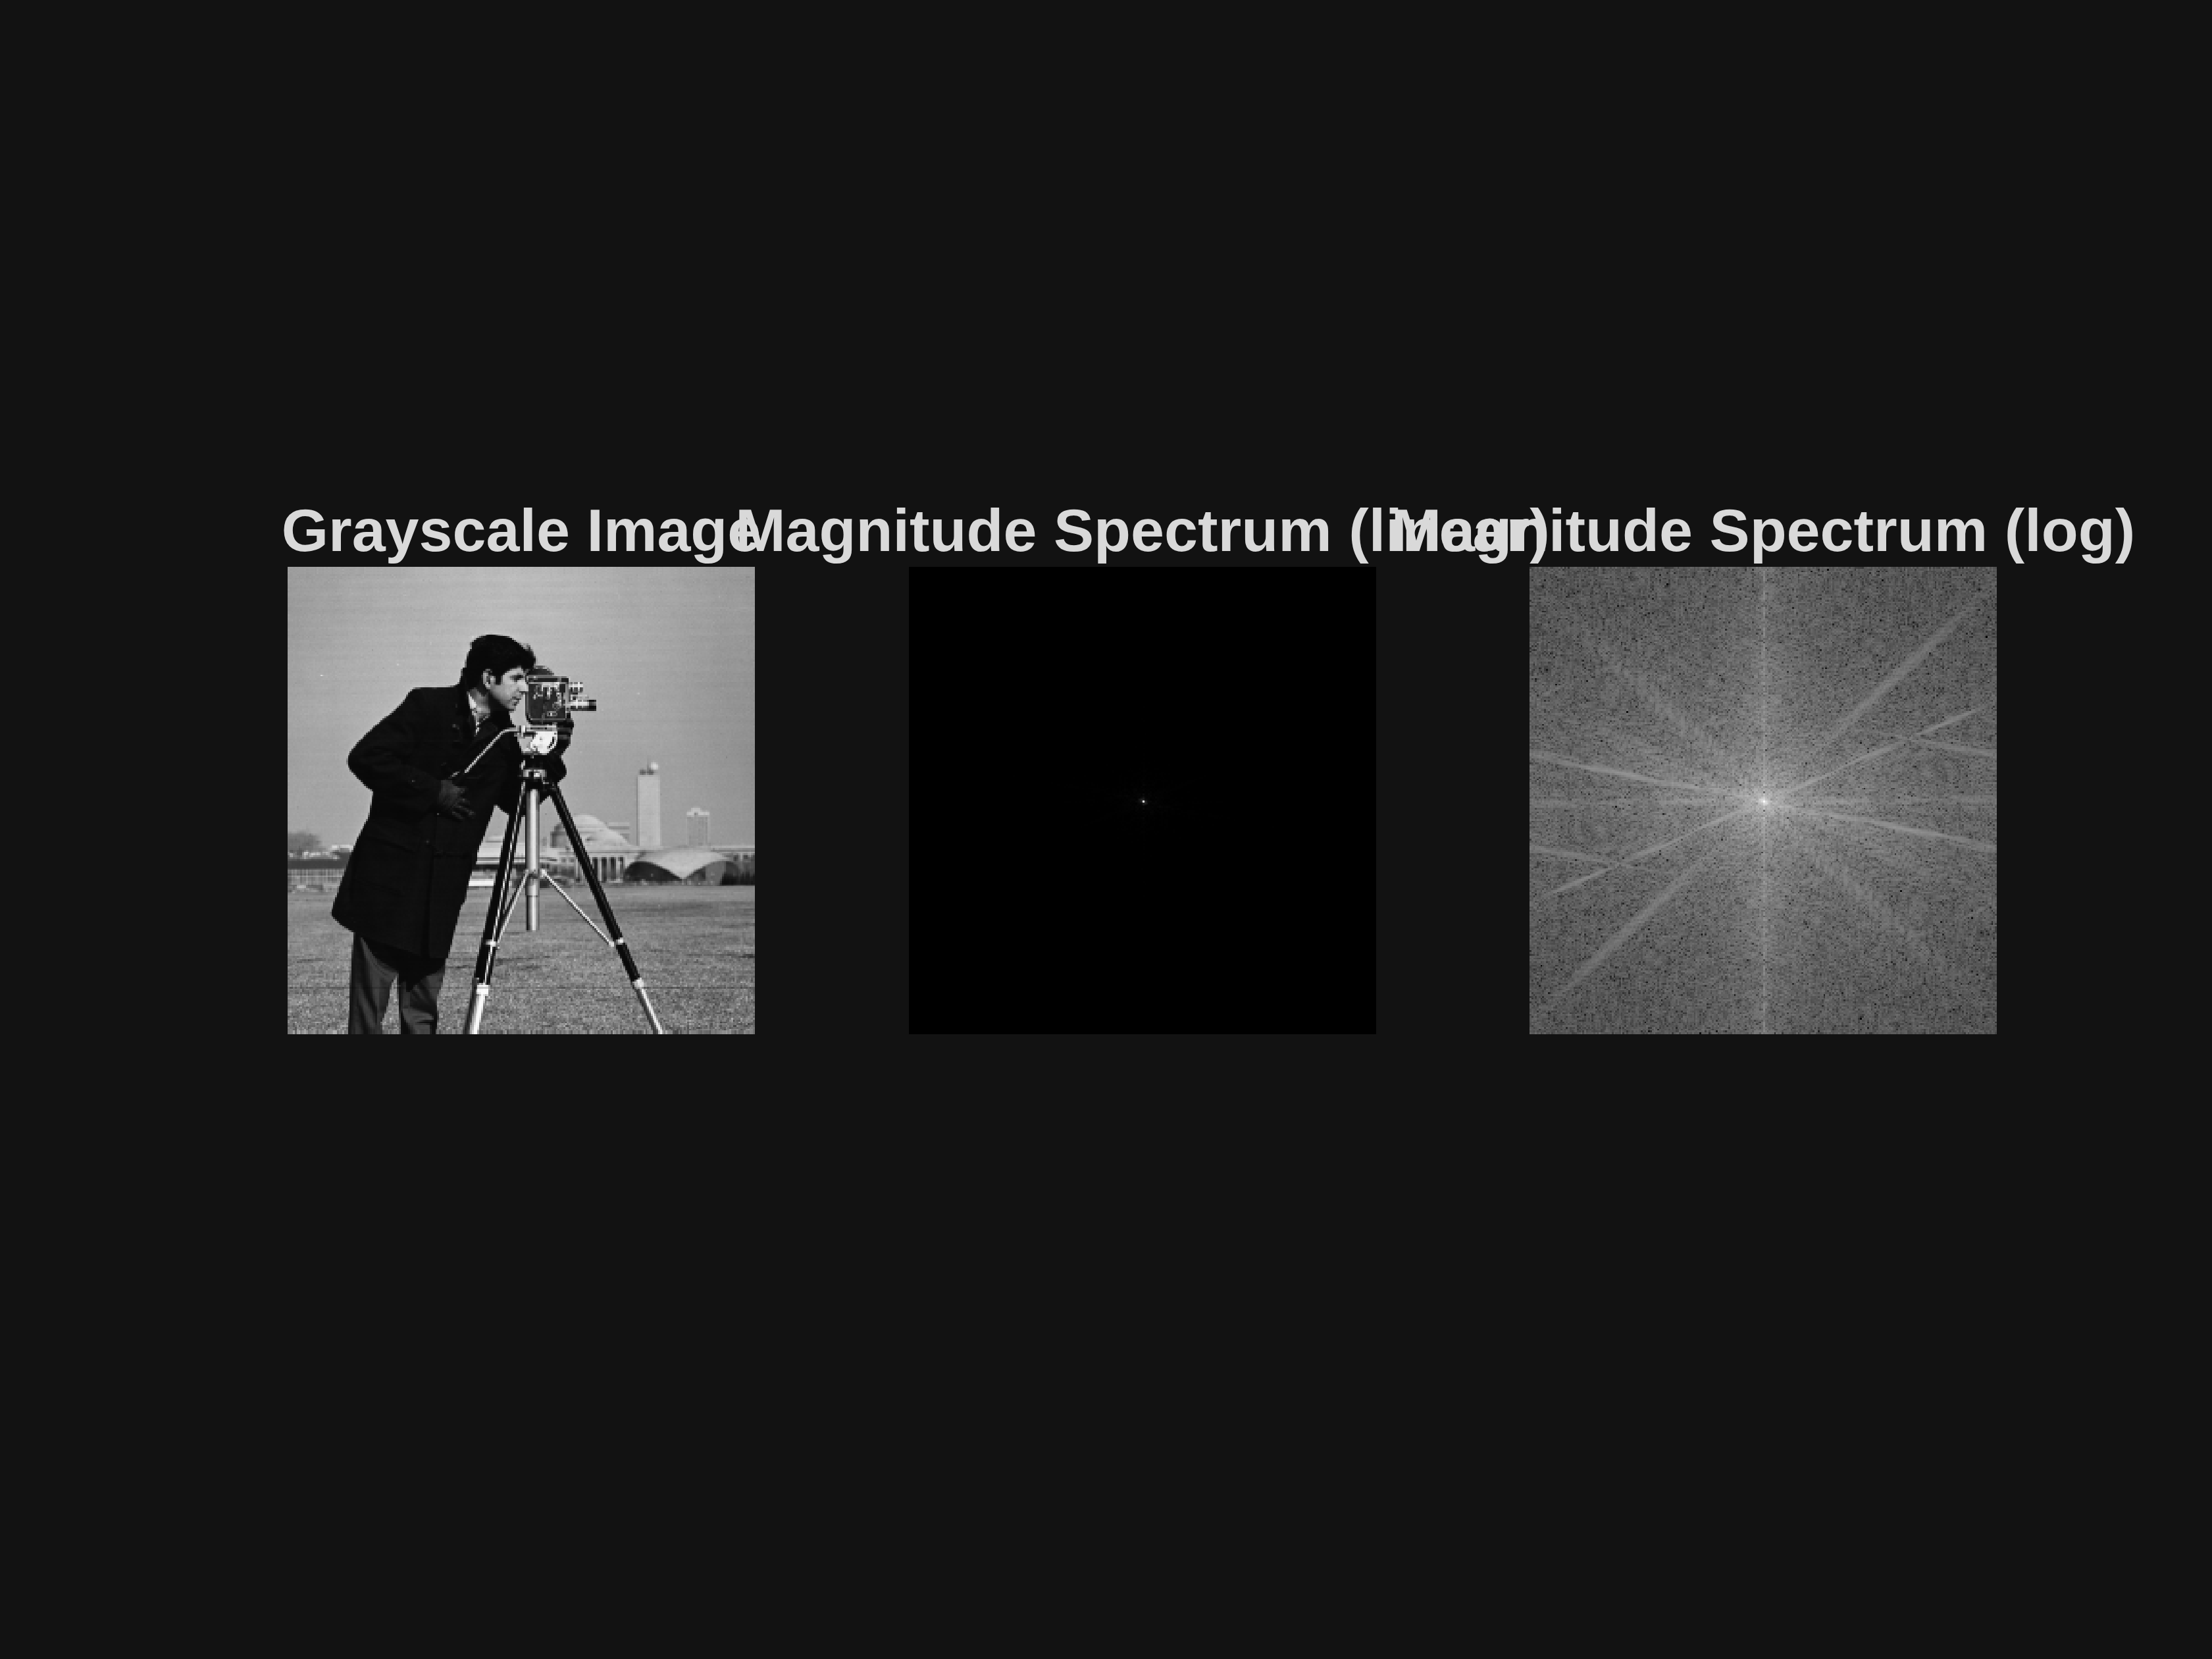

In [2]:

F_gray  = fft2(double(I_gray));
F_gray_c = fftshift(F_gray);
mag_gray = abs(F_gray_c);
log_mag_gray = log(1 + mag_gray);

figure;
subplot(1,3,1); imshow(I_gray); title('Grayscale Image');
subplot(1,3,2); imshow(mag_gray, []); title('Magnitude Spectrum (linear)');
subplot(1,3,3); imshow(log_mag_gray, []); title('Magnitude Spectrum (log)');


## 3. Fourier spectra of each RGB channel


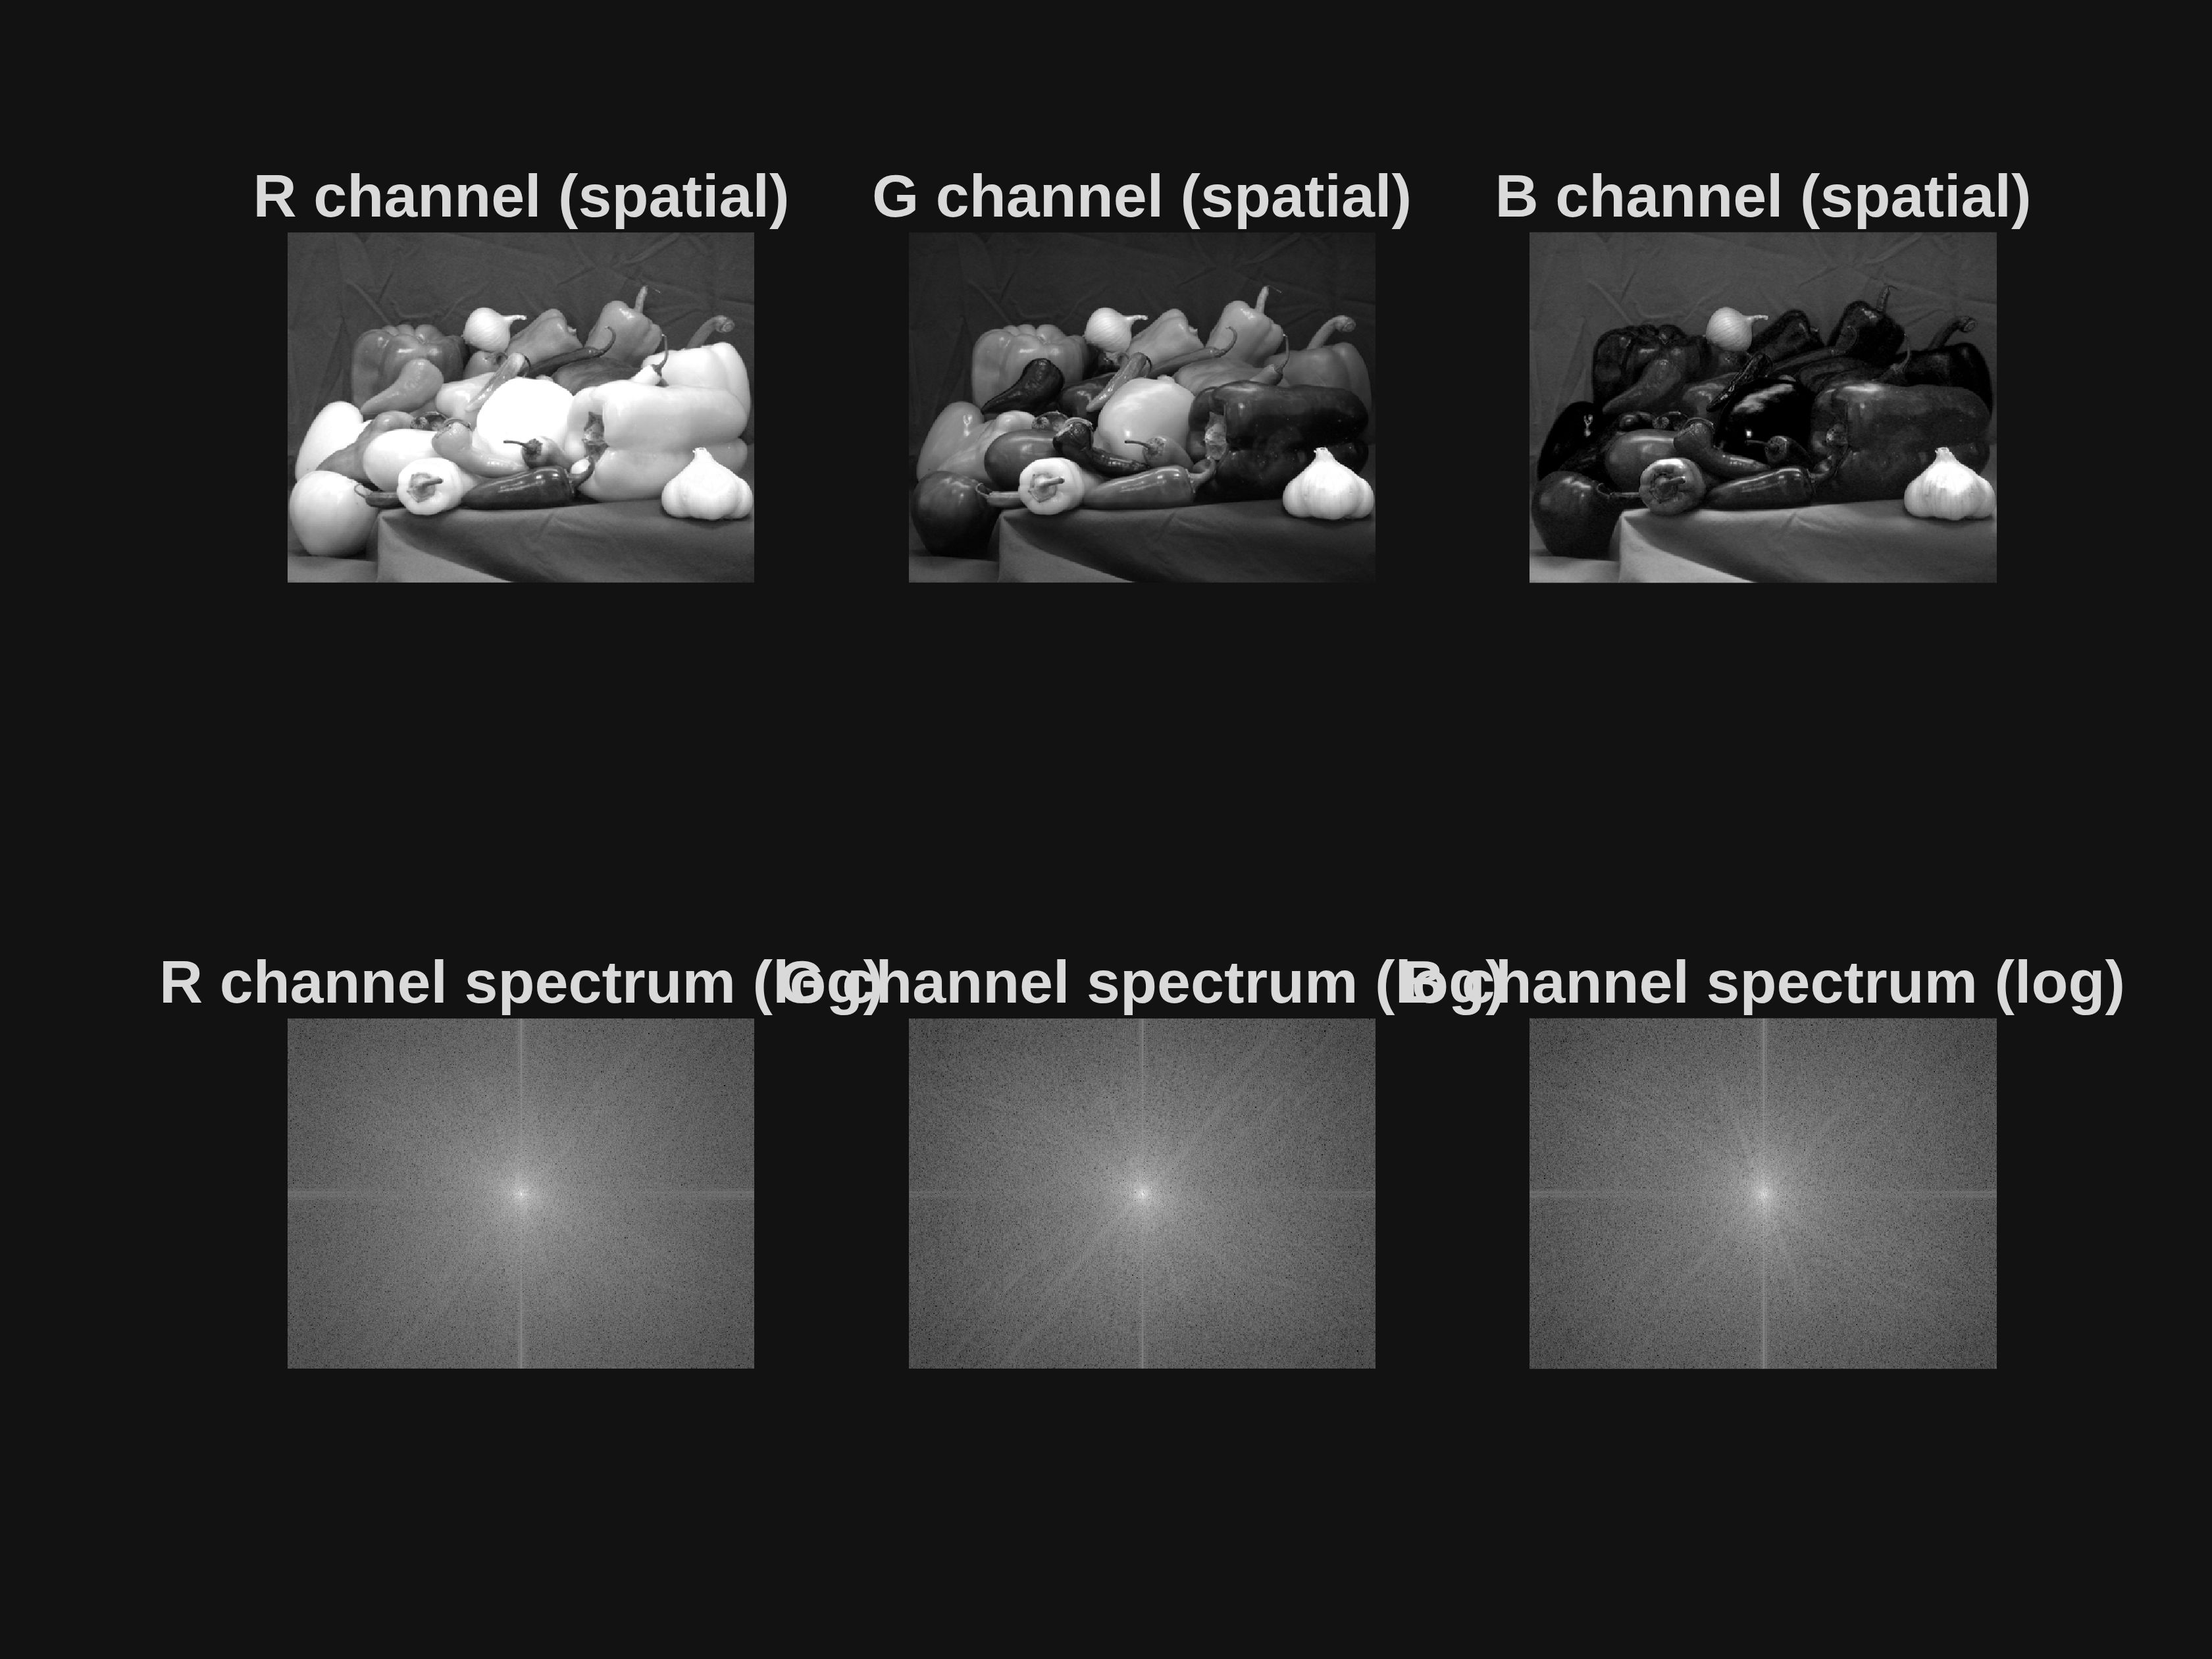

In [3]:

R = I_color(:,:,1);
G = I_color(:,:,2);
B = I_color(:,:,3);

F_R = fftshift(fft2(double(R)));
F_G = fftshift(fft2(double(G)));
F_B = fftshift(fft2(double(B)));

log_R = log(1 + abs(F_R));
log_G = log(1 + abs(F_G));
log_B = log(1 + abs(F_B));

figure;
subplot(2,3,1); imshow(R);     title('R channel (spatial)');
subplot(2,3,2); imshow(G);     title('G channel (spatial)');
subplot(2,3,3); imshow(B);     title('B channel (spatial)');
subplot(2,3,4); imshow(log_R, []); title('R channel spectrum (log)');
subplot(2,3,5); imshow(log_G, []); title('G channel spectrum (log)');
subplot(2,3,6); imshow(log_B, []); title('B channel spectrum (log)');


## 4. Reconstruct grayscale image from its spectrum


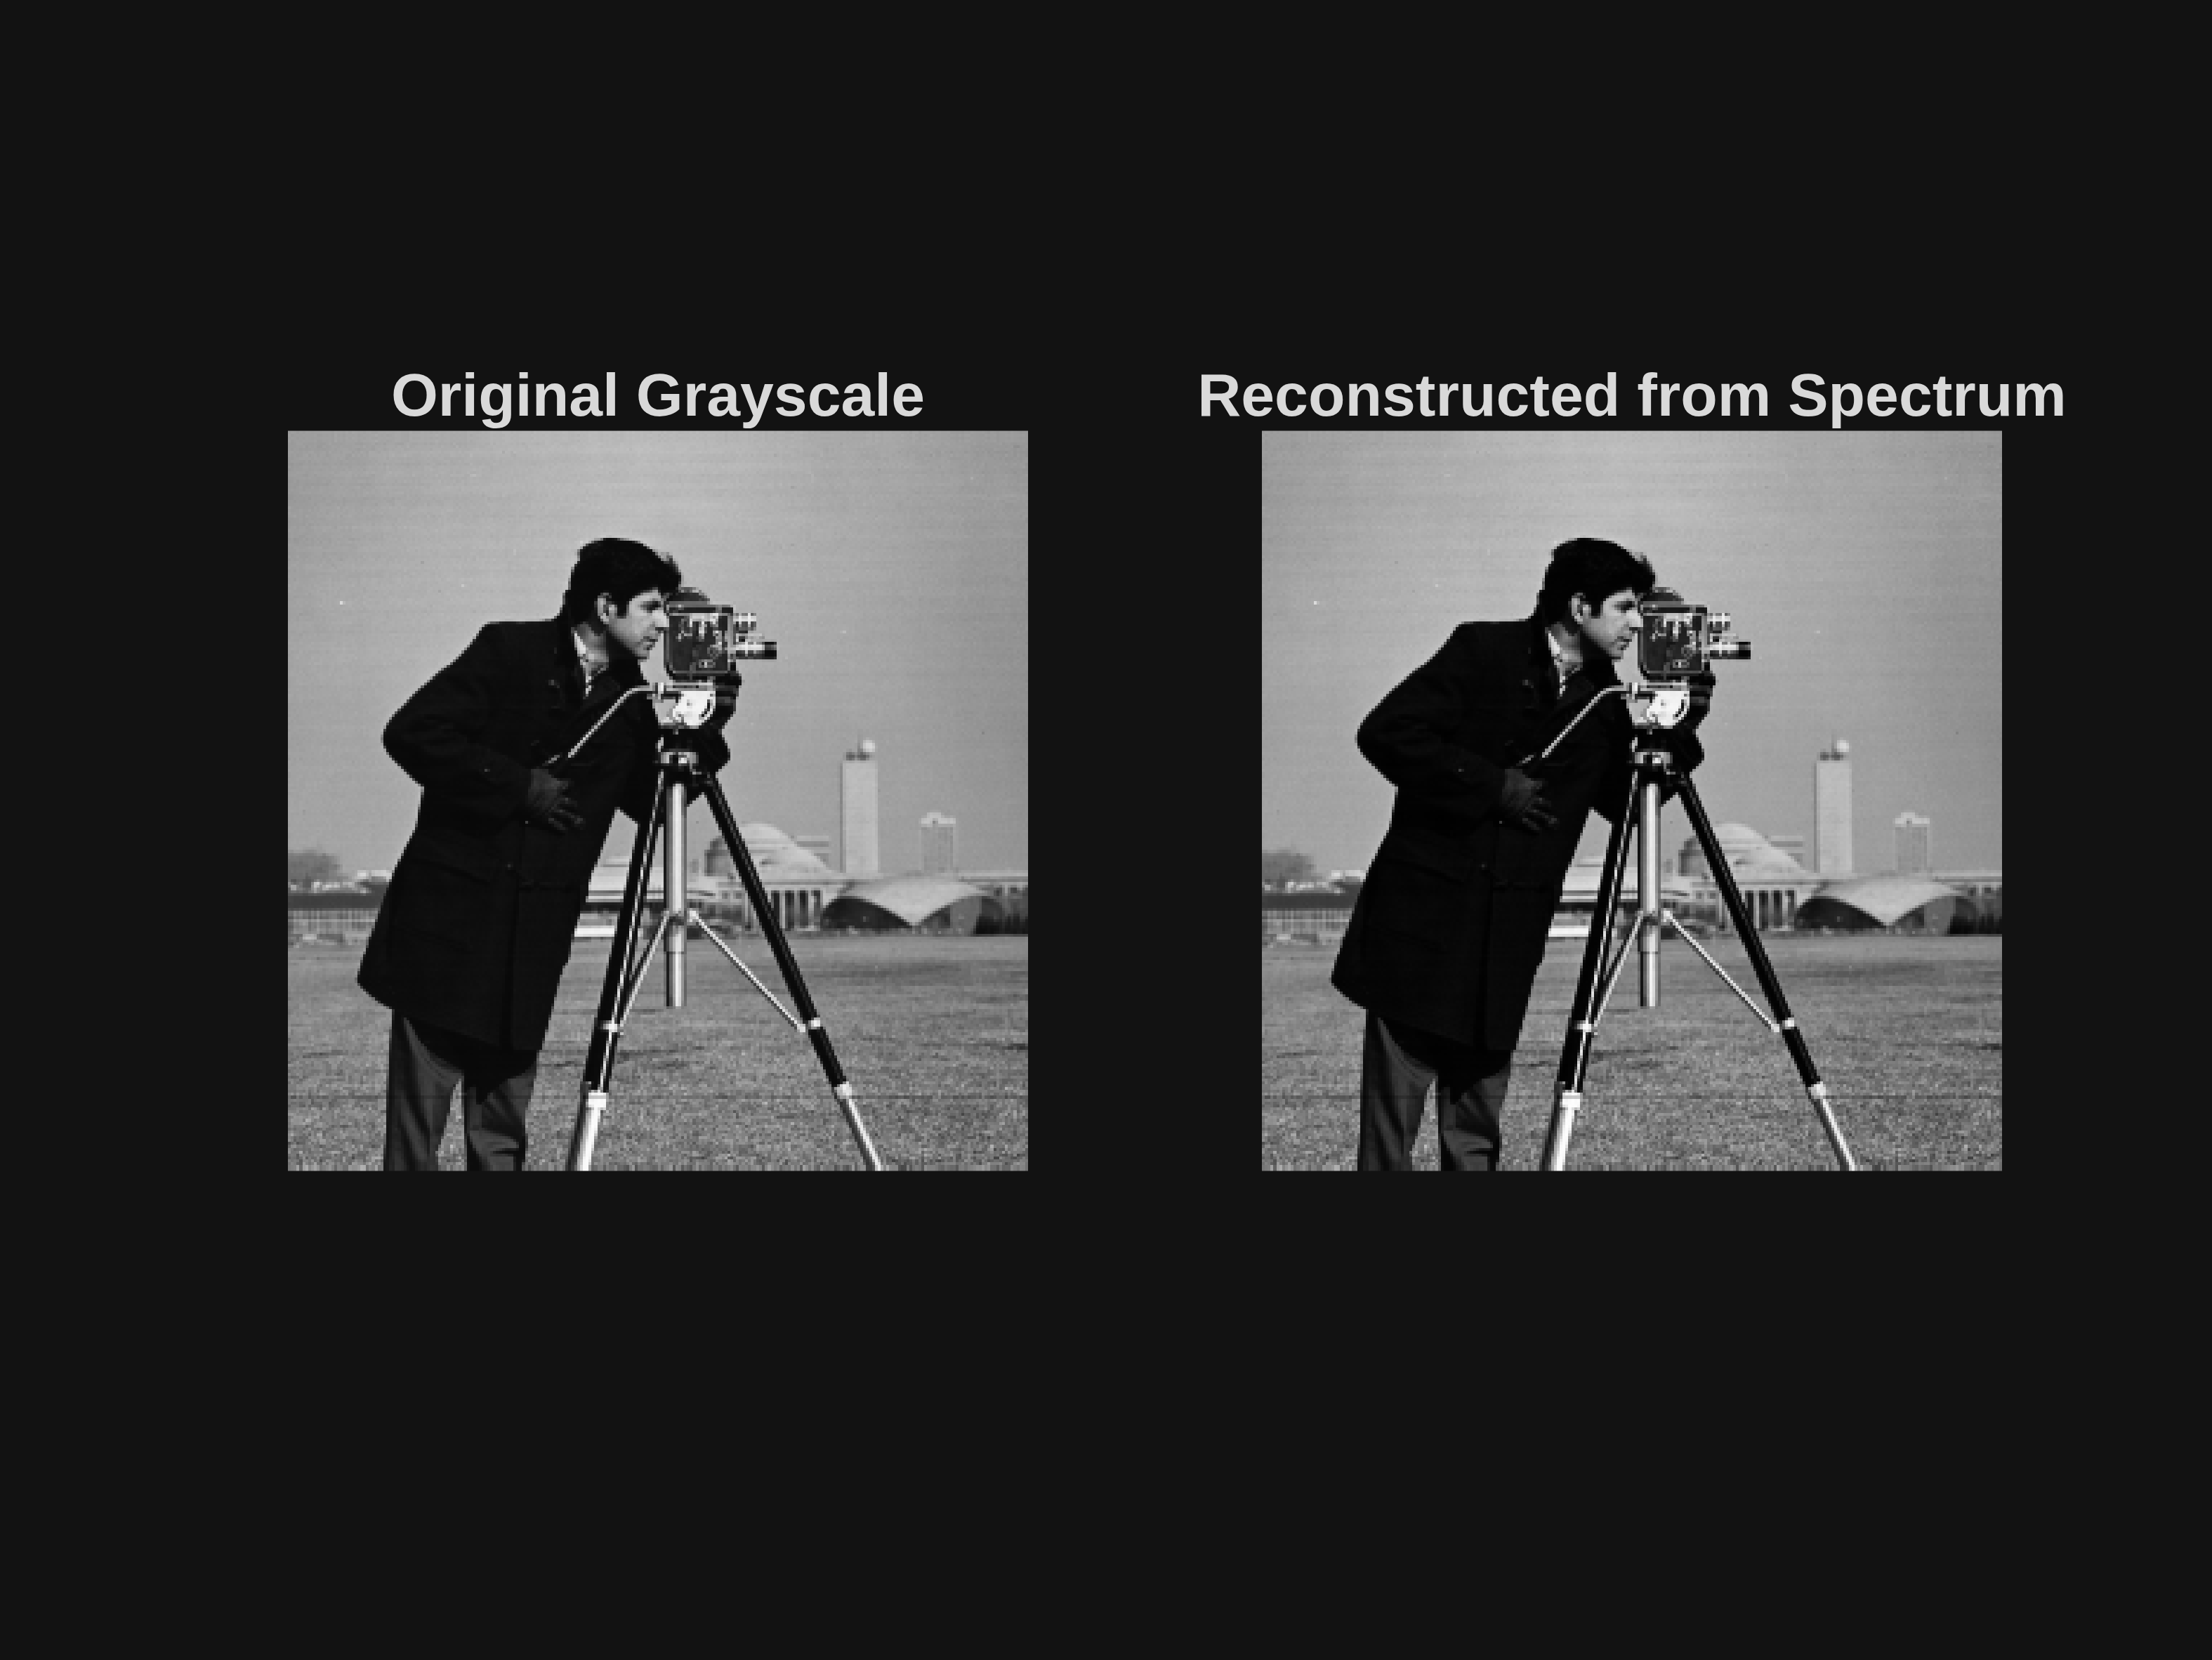

In [4]:

F_gray_unshift = ifftshift(F_gray_c);
I_gray_rec = real(ifft2(F_gray_unshift));

figure;
subplot(1,2,1); imshow(I_gray); title('Original Grayscale');
subplot(1,2,2); imshow(I_gray_rec,[]); title('Reconstructed from Spectrum');